# Clustering Denetimsiz - Unsupervised Learning Hedef "y" yok

In [1]:
#Clustering - benzerliklerine göre gruplara ayır. hedef yok

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel("cars.xls")

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #kaç gruba ayırmamız gerektiğini belirlemek için bir metrik
#elbow method - Dirsek methodu silhoutte score nerede değişmiyorsa o sayı kadar gruba bölebiliriz
#silhouette score ne kadar büyük olursa başarı oranımız büyük olur diye birşey yok, kaç gruba ayırmayılızı söyler

In [6]:
x=df[["Price","Mileage","Cylinder"]]

In [7]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [8]:
model=KMeans(n_clusters=4) # 4 gruba ayırdık

In [9]:
tahmin=model.fit(x) #hangi verinin kime ne kadar benzediğini öğrendi

In [10]:
tahmin=model.predict(x)

In [11]:
tahmin

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 3, 0,
       0, 3, 0, 0, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [12]:
x["cluster"]=tahmin

In [13]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,2
4,16339.170324,19832,6,0


In [14]:
silhouette_score(x,tahmin) #

0.4132257730918761

In [15]:
import matplotlib.pyplot as plt

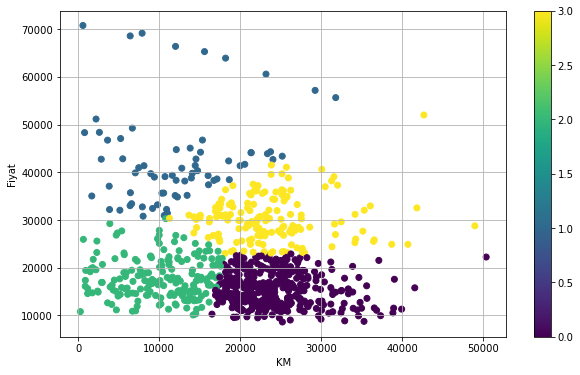

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price,c=tahmin)
plt.xlabel("KM")
plt.ylabel("Fiyat")
plt.colorbar()
plt.grid()

In [17]:
allscore=[]
allclusters=[]
uzakliklar=[]
def clust(kactane):
    
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklik=model.inertia_ 
        print("Cluster",i,"score",score)
        allscore.append(score)
        allclusters.append(i)
        uzakliklar.append(uzaklik)
clust(10)

Cluster 2 score 0.451145417770412
Cluster 3 score 0.4132108675760353
Cluster 4 score 0.41328610331558097
Cluster 5 score 0.3552183386351471
Cluster 6 score 0.36093730751217484
Cluster 7 score 0.3578597572578848
Cluster 8 score 0.3629428735250386
Cluster 9 score 0.3485873394187086
Cluster 10 score 0.35603864585751904
Cluster 11 score 0.35674355165749405


In [18]:
#0.41 den sonra 0.35 oldu ve değişmeyi bıraktı, cluster sayısını 4 alabiliriz

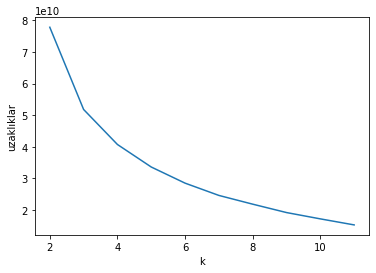

In [19]:
plt.xlabel("k")
plt.ylabel("uzaklıklar")
plt.plot(allclusters,uzakliklar)

In [20]:
#elbow metodunun nerde kırıldığını gösterdiği nokta, veriyi 4 farklı kümede toplamanın en ideal olduğunu gösteriyor.
#ucuz ve üzerine az km olan, ucuz üzerine çok km olan, pahalı ama az km, orta

In [21]:
df[df["Price"]>60000] #fiyatı 60000 binden fazla olan arabaları bir gruba atmış

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
150,70755.466717,583,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
151,68566.187189,6420,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
152,69133.731722,7892,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
153,66374.307040,12021,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
154,65281.481237,15600,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
155,63913.117248,18200,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
156,60567.549093,23193,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
